# Analysing feminism and covid

How was the corpus created.

- adding a language filter

# Loading libraries and data

In [1]:
# We import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import altair as alt

In [2]:
# We import the data
#web_pages =  pd.read_csv('data/web-pages.csv', nrows=1000) #uncomment this line and comment the next one if you would prefer to play with the first x rows to spare memory and time.
web_pages =  pd.read_csv('data/AWAC2_webpage_homeschooling.csv', low_memory=False)
web_pages

,crawl_date,domain,url,mime_type_web_server,mime_type_tika,language,content
0,20200328155431,ctvnews.ca,https://edmonton.ctvnews.ca/alberta-limits-gat...,text/html,text/html,en,"Alberta limits gatherings to 15 people, closes..."
1,20200328155700,ctvnews.ca,https://edmonton.ctvnews.ca/people-are-really-...,text/html,text/html,en,'People are really craving normalcy': Edmonton...
2,20200328160318,ctvnews.ca,https://edmonton.ctvnews.ca/this-is-what-edmon...,text/html,text/html,en,This is what Edmonton’s farmer's markets are d...
3,20200328160524,ctvnews.ca,https://edmonton.ctvnews.ca/new-landlord-restr...,text/html,text/html,en,New landlord restrictions announced in Alberta...
4,20200328160722,ctvnews.ca,https://edmonton.ctvnews.ca/health-canada-halt...,text/html,text/html,en,Health Canada halts sales of Alberta company's...
...,...,...,...,...,...,...,...
4303,20200421191838,hundred.org,https://hundred.org/en/collections/quality-edu...,text/html,text/html,en,Quality Education for all during Covid-19 We ...
4304,20200421105541,foxnews.com,https://www.foxnews.com/health/coronavirus-eve...,text/html,text/html,en,Coronavirus: What you need to know | Fox News ...
4305,20200421111400,psychologytoday.com,https://www.psychologytoday.com/gb/blog/naked-...,text/html,text/html,en,How to Curb Emotional Eating During the COVID-...
4306,20200421130606,courier-journal.com,https://www.courier-journal.com/story/life/wel...,text/html,text/html,en,Kentucky coronavirus updates: State's COVID-19...


## Duplicates

How to deal with duplicates?

# Duplictes URLs (same datetime, same URLs)

In [3]:
# We create with pivot table the file that will interest us. We focus on URLs
web_pages_count_byDomain = web_pages.groupby(['url','crawl_date']).size()
web_pages_count_byDomain = web_pages_count_byDomain.sort_values(ascending=False)
web_pages_count_byDomain.to_csv('generated/web_pages_count_byDomain.csv')
web_pages_count_byDomain = pd.read_csv('generated/web_pages_count_byDomain.csv', dtype = {'url':object,'crawl_date':str,'0':object})
web_pages_count_byDomain.dtypes

url           object
crawl_date    object
0             object
dtype: object

In [4]:
#we split the column
web_pages_count_byDomain['date']=web_pages_count_byDomain['crawl_date'].str.slice(stop=8)

#We retain only those where the 0 (number of tume it's crawled) == 2
mask=web_pages_count_byDomain['0']=='2'

web_pages_topURL = web_pages_count_byDomain[mask]
web_pages_topURL

,url,crawl_date,0,date
0,https://www.theatlantic.com/ideas/archive/2021...,20211223095502,2,20211223
1,https://www.washingtonpost.com/sports/2020/05/...,20200518023652,2,20200518
2,https://www.washingtonpost.com/politics/2020/0...,20200518072326,2,20200518
3,https://www.washingtonpost.com/local/coronavir...,20200518115407,2,20200518
4,https://covidstories.ihi.org/stories/we-dont-k...,20211222175640,2,20211222
5,https://www.insider.com/category/coronavirus,20200319215015,2,20200319
6,https://www.insider.com/category/coronavirus?w...,20200319215149,2,20200319
7,https://kujenga-amani.ssrc.org/2020/10/29/the-...,20210828133721,2,20210828
8,https://www.theatlantic.com/politics/archive/2...,20211223054028,2,20211223
9,https://www.insider.com/category/wuhan-coronav...,20200319215305,2,20200319


In [5]:
# Let's try a scatter plot
# source = data.cars()


# Another example of altair chart, in the form of a flowchart
alt.data_transformers.disable_max_rows()

selection = alt.selection_multi(fields=['language'], bind='legend')

crawl_stream = (
    alt.Chart(web_pages_topURL)
        .mark_circle()
        .encode(
            alt.Tooltip("date"),
            alt.X('date:O',
                axis=alt.Axis(domain=False, tickSize=0)
            ),
            alt.Y('url:O', stack='center', axis=None),
            alt.Color('url:N',
                scale=alt.Scale(scheme='category20b'),
            ),
            opacity=alt.condition(selection, alt.value(1), alt.value(0.2))
    ).interactive().add_selection(
            selection
        )
)

crawl_stream.properties(width=1000, height=500, title="Crawl frequency by language")

alt.Chart(...)

### And now by domain

In [6]:
#We reload web_pages, with the right columns types
web_pages =  pd.read_csv('data/AWAC2_webpage_homeschooling.csv', dtype = {'crawl_date':str, 'domain':object, 'url':object})
web_pages

#we split the column
web_pages['crawl_date'].astype(object)
web_pages['date']=web_pages['crawl_date'].str.slice(stop=8)

# We create with pivot table the file that will interest us. We focus on URLs
web_pages_count_byDomain = web_pages.groupby(['domain','date']).size()
web_pages_count_byDomain = web_pages_count_byDomain.sort_values(ascending=False)
web_pages_count_byDomain.to_csv('generated/web_pages_count_byDomain.csv')
web_pages_count_byDomain = pd.read_csv('generated/web_pages_count_byDomain.csv', dtype = {'domain':object,'crawl_date':str,'0':int})
web_pages_count_byDomain

,domain,date,0
0,washingtonpost.com,20200518,265
1,tchhsa.org,20201219,206
2,washingtonpost.com,20200517,138
3,montvillenj.org,20201219,85
4,covid-19archive.org,20210928,76
...,...,...,...
1629,jetzt.de,20200404,1
1630,jayblessed.com,20200617,1
1631,itv.com,20200324,1
1632,itv.com,20200322,1


In [7]:
#we split the column
#web_pages_count_byDomain['date']=web_pages_count_byDomain['crawl_date'].str.slice(stop=8)

#We retain only those where the 0 (number of tume it's crawled) > 10
mask=web_pages_count_byDomain['0'] > 20

web_pages_topDomain = web_pages_count_byDomain[mask]
web_pages_topDomain

,domain,date,0
0,washingtonpost.com,20200518,265
1,tchhsa.org,20201219,206
2,washingtonpost.com,20200517,138
3,montvillenj.org,20201219,85
4,covid-19archive.org,20210928,76
5,yahoo.com,20200322,54
6,twitter.com,20200420,50
7,montvillenj.org,20201218,49
8,twitter.com,20200424,49
9,cnnmoney.ch,20200321,40


In [8]:
# Let's try a scatter plot
# source = data.cars()


# Another example of altair chart, in the form of a flowchart
alt.data_transformers.disable_max_rows()

selection = alt.selection_multi(fields=['language'], bind='legend')

crawl_stream = (
    alt.Chart(web_pages_topDomain)
        .mark_circle()
        .encode(
            alt.Tooltip("domain"),
            alt.X('date:O',
                axis=alt.Axis(domain=False, tickSize=0)
            ),
            alt.Y('domain:O', stack='center', axis=None),
            alt.Color('domain:N',
                scale=alt.Scale(scheme='category20b'),
            ),
            opacity=alt.condition(selection, alt.value(1), alt.value(0.2))
    ).interactive().add_selection(
            selection
        )
)

crawl_stream.properties(width=800, height=400, title="Crawl frequency by language")

alt.Chart(...)

## Exploration of dataset

- Time and language distribution
- Time, Domain, language distribution

### Time distribution

In [9]:
# pd.pivot_table(web_pages,values='language',index=['crawl_date','domain'], columns='crawl_date')
web_pages_byCrawlDate_byLanguage = web_pages.groupby(['language','crawl_date']).size()
web_pages_byCrawlDate_byLanguage.to_csv('generated/web_pages_byCrawlDate_byLanguage.csv')
web_pages_byCrawlDate_byLanguage = pd.read_csv('generated/web_pages_byCrawlDate_byLanguage.csv', low_memory=False)
web_pages_byCrawlDate_byLanguage

,language,crawl_date,0
0,ar,20200420075908,1
1,ar,20200424203202,1
2,ar,20200522010832,1
3,ar,20200522020300,1
4,bg,20200420081046,1
...,...,...,...
4285,ur,20200424204322,1
4286,vi,20200327232846,1
4287,vi,20200328021644,1
4288,vi,20200420081012,1


In [10]:
# Let's try a scatter plot
# source = data.cars()


# Another example of altair chart, in the form of a flowchart
alt.data_transformers.disable_max_rows()

selection = alt.selection_multi(fields=['language'], bind='legend')

crawl_stream = (
    alt.Chart(web_pages_byCrawlDate_byLanguage)
        .mark_circle()
        .encode(
            alt.Tooltip("language"),
            alt.X('crawl_date:O',
                axis=alt.Axis(domain=False, tickSize=0)
            ),
            alt.Y('language:O', stack='center', axis=None),
            alt.Color('language:N',
                scale=alt.Scale(scheme='category20b'),
            ),
            opacity=alt.condition(selection, alt.value(1), alt.value(0.2))
    ).interactive().add_selection(
            selection
        )
)

crawl_stream.properties(width=1000, height=500, title="Crawl frequency by language")

alt.Chart(...)

### Domain distribution

In [11]:
web_pages_count_byDomain = web_pages.groupby(['domain','language','crawl_date']).size()
web_pages_count_byDomain = web_pages_count_byDomain.sort_values(ascending=False)
web_pages_count_byDomain.to_csv('generated/web_pages_count_byDomain.csv')
web_pages_count_byDomain = pd.read_csv('generated/web_pages_count_byDomain.csv')
web_pages_count_byDomain

,domain,language,crawl_date,0
0,theatlantic.com,en,20211223095502,2
1,dearpandemic.org,en,20211121113648,2
2,washingtonpost.com,en,20200518115407,2
3,ihi.org,en,20211222175640,2
4,ssrc.org,en,20210828133721,2
...,...,...,...,...
4289,fox5dc.com,en,20200325124103,1
4290,fox5dc.com,en,20200325145807,1
4291,fox5dc.com,en,20200325145830,1
4292,fox5dc.com,en,20200325145854,1


In [12]:
# Let's try a scatter plot
# source = data.cars()


# Another example of altair chart, in the form of a flowchart
alt.data_transformers.disable_max_rows()

selection = alt.selection_multi(fields=['language'], bind='legend')

crawl_stream = (
    alt.Chart(web_pages_count_byDomain)
        .mark_circle()
        .encode(
            alt.Tooltip("domain"),
            alt.X('crawl_date:O',
                axis=alt.Axis(domain=False, tickSize=0)
            ),
            alt.Y('language:O', stack='center', axis=None),
            alt.Color('language:N',
                scale=alt.Scale(scheme='category20b'),
            ),
            opacity=alt.condition(selection, alt.value(1), alt.value(0.2))
    ).interactive().add_selection(
            selection
        )
)

crawl_stream.properties(width=1000, height=500, title="by domain by date, tooltips= domain")

alt.Chart(...)

### Let's count words

In [13]:
# We use the english speaking part of the corpus

# We create a mask where language = en

mask=web_pages['language']=='en'

web_pages = web_pages[mask]
web_pages

,crawl_date,domain,url,mime_type_web_server,mime_type_tika,language,content,date
0,20200328155431,ctvnews.ca,https://edmonton.ctvnews.ca/alberta-limits-gat...,text/html,text/html,en,"Alberta limits gatherings to 15 people, closes...",20200328
1,20200328155700,ctvnews.ca,https://edmonton.ctvnews.ca/people-are-really-...,text/html,text/html,en,'People are really craving normalcy': Edmonton...,20200328
2,20200328160318,ctvnews.ca,https://edmonton.ctvnews.ca/this-is-what-edmon...,text/html,text/html,en,This is what Edmonton’s farmer's markets are d...,20200328
3,20200328160524,ctvnews.ca,https://edmonton.ctvnews.ca/new-landlord-restr...,text/html,text/html,en,New landlord restrictions announced in Alberta...,20200328
4,20200328160722,ctvnews.ca,https://edmonton.ctvnews.ca/health-canada-halt...,text/html,text/html,en,Health Canada halts sales of Alberta company's...,20200328
...,...,...,...,...,...,...,...,...
4303,20200421191838,hundred.org,https://hundred.org/en/collections/quality-edu...,text/html,text/html,en,Quality Education for all during Covid-19 We ...,20200421
4304,20200421105541,foxnews.com,https://www.foxnews.com/health/coronavirus-eve...,text/html,text/html,en,Coronavirus: What you need to know | Fox News ...,20200421
4305,20200421111400,psychologytoday.com,https://www.psychologytoday.com/gb/blog/naked-...,text/html,text/html,en,How to Curb Emotional Eating During the COVID-...,20200421
4306,20200421130606,courier-journal.com,https://www.courier-journal.com/story/life/wel...,text/html,text/html,en,Kentucky coronavirus updates: State's COVID-19...,20200421


In [14]:
# we transform a list of words into string with lower case only
web_pages['content_lower'] = web_pages['content'].astype('string').str.lower()
web_pages

,crawl_date,domain,url,mime_type_web_server,mime_type_tika,language,content,date,content_lower
0,20200328155431,ctvnews.ca,https://edmonton.ctvnews.ca/alberta-limits-gat...,text/html,text/html,en,"Alberta limits gatherings to 15 people, closes...",20200328,"alberta limits gatherings to 15 people, closes..."
1,20200328155700,ctvnews.ca,https://edmonton.ctvnews.ca/people-are-really-...,text/html,text/html,en,'People are really craving normalcy': Edmonton...,20200328,'people are really craving normalcy': edmonton...
2,20200328160318,ctvnews.ca,https://edmonton.ctvnews.ca/this-is-what-edmon...,text/html,text/html,en,This is what Edmonton’s farmer's markets are d...,20200328,this is what edmonton’s farmer's markets are d...
3,20200328160524,ctvnews.ca,https://edmonton.ctvnews.ca/new-landlord-restr...,text/html,text/html,en,New landlord restrictions announced in Alberta...,20200328,new landlord restrictions announced in alberta...
4,20200328160722,ctvnews.ca,https://edmonton.ctvnews.ca/health-canada-halt...,text/html,text/html,en,Health Canada halts sales of Alberta company's...,20200328,health canada halts sales of alberta company's...
...,...,...,...,...,...,...,...,...,...
4303,20200421191838,hundred.org,https://hundred.org/en/collections/quality-edu...,text/html,text/html,en,Quality Education for all during Covid-19 We ...,20200421,quality education for all during covid-19 we ...
4304,20200421105541,foxnews.com,https://www.foxnews.com/health/coronavirus-eve...,text/html,text/html,en,Coronavirus: What you need to know | Fox News ...,20200421,coronavirus: what you need to know | fox news ...
4305,20200421111400,psychologytoday.com,https://www.psychologytoday.com/gb/blog/naked-...,text/html,text/html,en,How to Curb Emotional Eating During the COVID-...,20200421,how to curb emotional eating during the covid-...
4306,20200421130606,courier-journal.com,https://www.courier-journal.com/story/life/wel...,text/html,text/html,en,Kentucky coronavirus updates: State's COVID-19...,20200421,kentucky coronavirus updates: state's covid-19...


In [15]:
# we load in a dataframe the column 'content'
# content=web_pages['content']

# we import stopwords from nltk
import nltk.corpus
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

# We remove stopwords from the dataframe

web_pages['content_clean'] = web_pages['content_lower'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/frederic.clavert/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
web_pages

,crawl_date,domain,url,mime_type_web_server,mime_type_tika,language,content,date,content_lower,content_clean
0,20200328155431,ctvnews.ca,https://edmonton.ctvnews.ca/alberta-limits-gat...,text/html,text/html,en,"Alberta limits gatherings to 15 people, closes...",20200328,"alberta limits gatherings to 15 people, closes...","alberta limits gatherings 15 people, closes no..."
1,20200328155700,ctvnews.ca,https://edmonton.ctvnews.ca/people-are-really-...,text/html,text/html,en,'People are really craving normalcy': Edmonton...,20200328,'people are really craving normalcy': edmonton...,'people really craving normalcy': edmonton bus...
2,20200328160318,ctvnews.ca,https://edmonton.ctvnews.ca/this-is-what-edmon...,text/html,text/html,en,This is what Edmonton’s farmer's markets are d...,20200328,this is what edmonton’s farmer's markets are d...,edmonton’s farmer's markets stay open covid-19...
3,20200328160524,ctvnews.ca,https://edmonton.ctvnews.ca/new-landlord-restr...,text/html,text/html,en,New landlord restrictions announced in Alberta...,20200328,new landlord restrictions announced in alberta...,new landlord restrictions announced alberta co...
4,20200328160722,ctvnews.ca,https://edmonton.ctvnews.ca/health-canada-halt...,text/html,text/html,en,Health Canada halts sales of Alberta company's...,20200328,health canada halts sales of alberta company's...,health canada halts sales alberta company's co...
...,...,...,...,...,...,...,...,...,...,...
4303,20200421191838,hundred.org,https://hundred.org/en/collections/quality-edu...,text/html,text/html,en,Quality Education for all during Covid-19 We ...,20200421,quality education for all during covid-19 we ...,quality education covid-19 using cookies give ...
4304,20200421105541,foxnews.com,https://www.foxnews.com/health/coronavirus-eve...,text/html,text/html,en,Coronavirus: What you need to know | Fox News ...,20200421,coronavirus: what you need to know | fox news ...,coronavirus: need know | fox news fox news cor...
4305,20200421111400,psychologytoday.com,https://www.psychologytoday.com/gb/blog/naked-...,text/html,text/html,en,How to Curb Emotional Eating During the COVID-...,20200421,how to curb emotional eating during the covid-...,curb emotional eating covid-19 pandemic | psyc...
4306,20200421130606,courier-journal.com,https://www.courier-journal.com/story/life/wel...,text/html,text/html,en,Kentucky coronavirus updates: State's COVID-19...,20200421,kentucky coronavirus updates: state's covid-19...,kentucky coronavirus updates: state's covid-19...


In [17]:
#Let's now lemmatize

import nltk

w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

web_pages['content_clean'] = web_pages['content_clean'].apply(lemmatize_text)


In [18]:
# On modifie le type de la colone to string
web_pages['content_clean'].to_csv('generated/content_clean.csv')

# content_clean = str(web_pages['content_clean'])
content_clean = pd.read_csv('generated/content_clean.csv', low_memory=False)

In [19]:
content_clean['content_clean'] = content_clean['content_clean'].str.lower().str.replace('[^\w\s]','', regex=True)
 
words_count = content_clean['content_clean'].str.split(expand=True).stack().value_counts().reset_index()
 
words_count.columns = ['Word', 'Frequency'] 
 
words_count

,Word,Frequency
0,covid19,125505
1,health,109339
2,new,96223
3,state,80406
4,coronavirus,67812
...,...,...
151864,ответственности,1
151865,вебсайтами,1
151866,сторонmarkdefsstylenormal_key4faec0385e00_type...,1
151867,отказ,1


In [20]:
words_count.to_csv('generated/words_count.csv')

## Topic modeling

In [21]:
# set up

# to install the required packages. Uncomment the two next lines if necessary
# !pip install --upgrade pip
# !pip install pandas seaborn sklearn pyldavis

%pylab inline
import warnings                         # Disable some warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
#from dataiku import pandasutils as pdu
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction import text 

from sklearn.decomposition import LatentDirichletAllocation,NMF
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
from stop_words import get_stop_words

Populating the interactive namespace from numpy and matplotlib


In [22]:
# First, we load web-pages.csv as a dataframe
pd.read_csv('data/AWAC2_webpage_homeschooling.csv', low_memory=False) # add nrows = 1000 to load only the first 1000 lines.

# We create a mask where the language column = en
web_pages_mask_en = web_pages['language']=='en'

# We apply this mask to web_pages so that our new dataframe is web_pages_en
web_pages_en = web_pages[web_pages_mask_en]

In [23]:
#We display our dataframe web_pages_en
web_pages_en

,crawl_date,domain,url,mime_type_web_server,mime_type_tika,language,content,date,content_lower,content_clean
0,20200328155431,ctvnews.ca,https://edmonton.ctvnews.ca/alberta-limits-gat...,text/html,text/html,en,"Alberta limits gatherings to 15 people, closes...",20200328,"alberta limits gatherings to 15 people, closes...","[alberta, limit, gathering, 15, people,, close..."
1,20200328155700,ctvnews.ca,https://edmonton.ctvnews.ca/people-are-really-...,text/html,text/html,en,'People are really craving normalcy': Edmonton...,20200328,'people are really craving normalcy': edmonton...,"['people, really, craving, normalcy':, edmonto..."
2,20200328160318,ctvnews.ca,https://edmonton.ctvnews.ca/this-is-what-edmon...,text/html,text/html,en,This is what Edmonton’s farmer's markets are d...,20200328,this is what edmonton’s farmer's markets are d...,"[edmonton’s, farmer's, market, stay, open, cov..."
3,20200328160524,ctvnews.ca,https://edmonton.ctvnews.ca/new-landlord-restr...,text/html,text/html,en,New landlord restrictions announced in Alberta...,20200328,new landlord restrictions announced in alberta...,"[new, landlord, restriction, announced, albert..."
4,20200328160722,ctvnews.ca,https://edmonton.ctvnews.ca/health-canada-halt...,text/html,text/html,en,Health Canada halts sales of Alberta company's...,20200328,health canada halts sales of alberta company's...,"[health, canada, halt, sale, alberta, company'..."
...,...,...,...,...,...,...,...,...,...,...
4303,20200421191838,hundred.org,https://hundred.org/en/collections/quality-edu...,text/html,text/html,en,Quality Education for all during Covid-19 We ...,20200421,quality education for all during covid-19 we ...,"[quality, education, covid-19, using, cooky, g..."
4304,20200421105541,foxnews.com,https://www.foxnews.com/health/coronavirus-eve...,text/html,text/html,en,Coronavirus: What you need to know | Fox News ...,20200421,coronavirus: what you need to know | fox news ...,"[coronavirus:, need, know, |, fox, news, fox, ..."
4305,20200421111400,psychologytoday.com,https://www.psychologytoday.com/gb/blog/naked-...,text/html,text/html,en,How to Curb Emotional Eating During the COVID-...,20200421,how to curb emotional eating during the covid-...,"[curb, emotional, eating, covid-19, pandemic, ..."
4306,20200421130606,courier-journal.com,https://www.courier-journal.com/story/life/wel...,text/html,text/html,en,Kentucky coronavirus updates: State's COVID-19...,20200421,kentucky coronavirus updates: state's covid-19...,"[kentucky, coronavirus, updates:, state's, cov..."


In [24]:
#we display the columns so that we can choose the right one to process the topic modelling
web_pages_en.columns

Index(['crawl_date', 'domain', 'url', 'mime_type_web_server', 'mime_type_tika',
       'language', 'content', 'date', 'content_lower', 'content_clean'],
      dtype='object')

In [25]:
# We define the column that we will choose for the topic modelling
raw_text_col_en = "content"
# We create the dataframe with the "content" column only
raw_text_en = web_pages_en[raw_text_col_en]
# We remove the NaN to be sure
raw_text_en = raw_text_en.dropna()
# We display the result (to be sure we did what we wanted to do)
raw_text_en

0       Alberta limits gatherings to 15 people, closes...
1       'People are really craving normalcy': Edmonton...
2       This is what Edmonton’s farmer's markets are d...
3       New landlord restrictions announced in Alberta...
4       Health Canada halts sales of Alberta company's...
                              ...                        
4303    Quality Education for all during Covid-19  We ...
4304    Coronavirus: What you need to know | Fox News ...
4305    How to Curb Emotional Eating During the COVID-...
4306    Kentucky coronavirus updates: State's COVID-19...
4307    Integrating Domestic Violence Prevention and M...
Name: content, Length: 4104, dtype: object

In [26]:
# we remove the stopwords

# Uncomment the next line to define custom stopwords
#custom_stop_words = [u'did', u'good', u'right', u'said', u'does', u'way',u'edu', u'com', u'mail', u'thanks', u'post', u'address', u'university', u'email', u'soon', u'article',u'people', u'god', u'don', u'think', u'just', u'like', u'know', u'time', u'believe', u'say',u'don', u'just', u'think', u'probably', u'use', u'like', u'look', u'stuff', u'really', u'make', u'isn']

stop_words_en = text.ENGLISH_STOP_WORDS #.union(custom_stop_words) - add this part if you added custom stop words

In [27]:
#We first initialise a CountVectorizer() object and then apply the fit_transform method to the text.

cnt_vectorizer_en = CountVectorizer(stop_words = stop_words_en,lowercase = True,
                    token_pattern = r'\b[a-zA-Z]{3,}\b', max_df = 0.85, min_df = 2)

text_cnt_en = cnt_vectorizer_en.fit_transform(raw_text_en)

print(text_cnt_en.shape)

(4104, 64302)


In [28]:
# We first initialise a TfidfVectorizer() object and then apply the fit_transform method to the text.

tfidf_vectorizer_en = TfidfVectorizer(strip_accents = 'unicode',stop_words = stop_words_en,lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b', max_df = 0.75, min_df = 0.02)

text_tfidf_en = tfidf_vectorizer_en.fit_transform(raw_text_en)

print(text_tfidf_en.shape)

(4104, 9648)


In [29]:
# We go for LDA

n_topics = 10
topics_model_en = LatentDirichletAllocation(n_topics, random_state=0)
topics_model_en.fit(text_tfidf_en)

n_top_words = 25
feature_names_en = tfidf_vectorizer_en.get_feature_names()

def get_top_words_topic(topic_idx):
    topic = topics_model_en.components_[topic_idx]
   
    print( [feature_names_en[i] for i in topic.argsort()[:-n_top_words - 1:-1]] )
    
for topic_idx, topic in enumerate(topics_model_en.components_):
    print ("Topic #%d:" % topic_idx )
    get_top_words_topic(topic_idx)
dict_topic_name = {i: "topic_"+str(i) for i in range(n_topics)}
#dict_topic_name = my_dict_topic_name #Define here your own name mapping and uncomment this !    print ("")

Topic #0:
['morris', 'issued', 'announcing', 'murphy', 'jersey', 'county', 'release', 'governor', 'order', 'executive', 'press', 'state', 'residents', 'individuals', 'department', 'montville', 'public', 'facilities', 'emergency', 'township', 'person', 'indoor', 'outdoor', 'businesses', 'guidance']
Topic #1:
['security', 'psychology', 'products', 'cloud', 'learning', 'business', 'counselling', 'employees', 'summer', 'solutions', 'allowance', 'points', 'mac', 'android', 'downloads', 'achievement', 'blog', 'devices', 'personality', 'cybercriminals', 'children', 'eating', 'streaming', 'trial', 'gain']
Topic #2:
['fabulous', 'sun', 'fiction', 'mum', 'flash', 'scottish', 'bingo', 'irish', 'dream', 'corp', 'clarifications', 'stacey', 'liz', 'commissioning', 'newspapers', 'essay', 'poetry', 'complaints', 'syndication', 'hairdressers', 'sue', 'motors', 'preferences', 'reproduce', 'realtor']
Topic #3:
['alberta', 'edmonton', 'false', 'ctv', 'yahoo', 'lifestyle', 'air', 'date', 'cases', 'swiss', 

/Users/frederic.clavert/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


<AxesSubplot:xlabel='topic'>

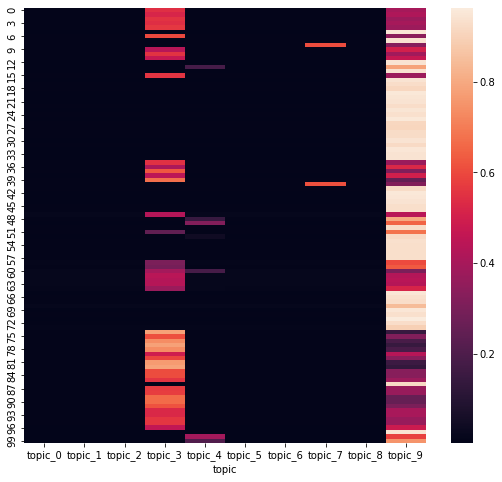

In [30]:
dict_topic_name = {i: "topic_"+str(i) for i in range(n_topics)}
#dict_topic_name = my_dict_topic_name #Define here your own name mapping and uncomment this !

# retrieve the document-topic matrix

document_model = pd.DataFrame(topics_model_en.transform(text_tfidf_en))
document_model.columns.name = 'topic'
document_model.rename(columns = dict_topic_name, inplace = True) #naming topics

plt.figure(figsize=(9,8))
sns.heatmap(document_model.sort_index()[:100]) #we limit here to the first 10 texts

<AxesSubplot:xlabel='topic'>

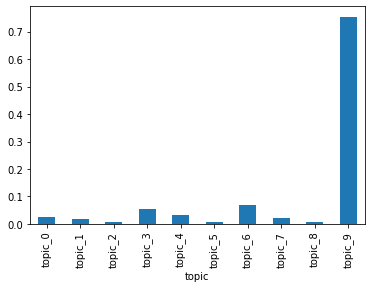

In [31]:
topics_proportion = document_model.sum()/document_model.sum().sum()
topics_proportion.plot(kind = "bar")

## Network analysis

- going to the webgraph dataset and select all line with 'feminism' as anchor text